In [1]:
import pandas as pd

In [2]:
X = pd.read_csv("C:/Users/ROG STRIX/Desktop/IOT project/cropdata.csv")
X.head()

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0


In [3]:
X_train_Id = X.iloc[:, 0]
y = X.iloc[:, -1]
X = X.iloc[:, 0:-1]
print(X_train_Id.head())
print(y.head())
X.head()

0    Wheat
1    Wheat
2    Wheat
3    Wheat
4    Wheat
Name: CropType, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: Irrigation, dtype: int64


,CropType,CropDays,SoilMoisture,temperature,Humidity
0,Wheat,10,400,30,15
1,Wheat,7,200,30,32
2,Wheat,9,300,21,28
3,Wheat,3,500,40,22
4,Wheat,2,700,23,34


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['CropDays', 'SoilMoisture', 'temperature', 'Humidity']
categorical_columns = ['CropType']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),  
        ('cat', OrdinalEncoder(), categorical_columns)
    ])

transformed_data = preprocessor.fit_transform(X)
print(transformed_data)
X_transformed = pd.DataFrame(transformed_data, columns=numerical_columns + categorical_columns)

X_transformed.head()

[[0.0430622  0.32183908 0.57142857 0.05405405 8.        ]
 [0.02870813 0.09195402 0.57142857 0.28378378 8.        ]
 [0.03827751 0.20689655 0.25       0.22972973 8.        ]
 ...
 [0.45933014 0.31954023 0.39285714 0.09459459 0.        ]
 [0.46889952 0.64137931 0.35714286 0.09459459 0.        ]
 [0.4784689  0.09310345 0.25       0.04054054 0.        ]]


,CropDays,SoilMoisture,temperature,Humidity,CropType
0,0.043062,0.321839,0.571429,0.054054,8.0
1,0.028708,0.091954,0.571429,0.283784,8.0
2,0.038278,0.206897,0.250000,0.229730,8.0
3,0.009569,0.436782,0.928571,0.148649,8.0
4,0.004785,0.666667,0.321429,0.310811,8.0


In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_classifier = SVC()
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, verbose=True)
grid_search_svm.fit(X_transformed, y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=True)

In [9]:
print(grid_search_svm.best_estimator_)

SVC(C=10, kernel='linear')


In [10]:
clf = SVC(C=10, kernel='linear')
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.71287129, 0.87      , 0.86      , 0.83      , 0.9       ])

In [19]:
import pandas as pd

# Create a list of data
data = scores

# Create a DataFrame
df = pd.DataFrame(data, columns=["Validation scores"])

# Print the DataFrame
df


,Validation scores
0,0.712871
1,0.870000
2,0.860000
3,0.830000
4,0.900000


In [11]:
clf.fit(X_transformed, y)

SVC(C=10, kernel='linear')

In [12]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 42)

In [13]:
dtree = SVC(C=10, kernel='linear')

dtree.fit(X_train , y_train)

SVC(C=10, kernel='linear')

In [14]:
y_pred = dtree.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8613861386138614

In [16]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [17]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

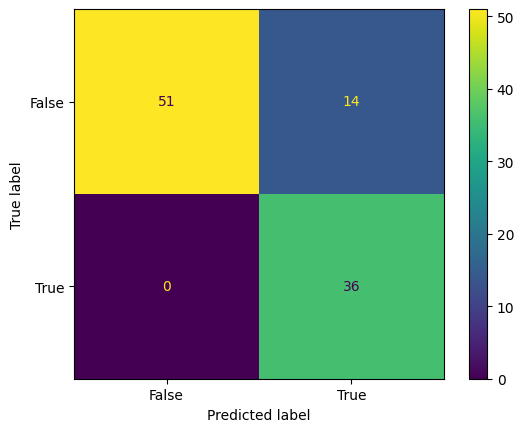

In [18]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.8613861386138614
Precision: 0.72
Recall (Sensitivity): 1.0
F1-Score: 0.8372093023255814
